# Boston Crime
Prepared by **Fatemeh Arab** 

**BOSTON CRIME DATASET:** 

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.



In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.patches as patches
import math
import copy
import itertools
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
!gdown --id 1rHfgKlr-kVedLqOVqGd6jdeUmG1wcNLh

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rHfgKlr-kVedLqOVqGd6jdeUmG1wcNLh
To: /content/crime.csv
100% 57.7M/57.7M [00:00<00:00, 180MB/s]


## EDA and Data Preprocessing

Read 'crime.csv' file , we must to encode data 

In [3]:
df=pd.read_csv('crime.csv', encoding='windows-1252', delimiter=',')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
## Shape of data
df.shape

(319073, 17)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

We now have a general understanding of the data, for a better understanding we will visualize the data.

In [4]:
## Date to datetime 
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

print("start date:", df['OCCURRED_ON_DATE'].min())
print("end date:", df['OCCURRED_ON_DATE'].max())

start date: 2015-06-15 00:00:00
end date: 2018-09-03 21:25:00


In [5]:
## Handling Location
df['Lat'] = pd.to_numeric(df['Lat'])
df['Long'] = pd.to_numeric(df['Long'])

In [6]:
## Display unique of each columns
for column in df.columns : 
    print('Length of unique data for {0} is {1} '.format(column , len(df[column].unique())))
    print('unique data for {0} is {1} '.format(column , df[column].unique()))

Length of unique data for INCIDENT_NUMBER is 282517 
unique data for INCIDENT_NUMBER is ['I182070945' 'I182070943' 'I182070941' ... 'I030217815-08'
 'I010370257-00' '142052550'] 
Length of unique data for OFFENSE_CODE is 222 
unique data for OFFENSE_CODE is [ 619 1402 3410 3114 3820  724 3301  301 3108 2647 3201 3006 3305  614
 3801 3803  522 3831  802 2007 2900 2907 2629 2662 3207  613 3109 2612
 1843 3125 1841 3802 3018 2405  617 3625 3106 3501 3115  616 3807 1102
 1849 2905 1810 1842 1806 1848 1844  423 3205  413 1501 3001 3830  561
 2914 2610 1109  706 2403 3160  900  801 3002  520 2648  670  615 3116
 1504 1830  361 2006  311 1001 3810 2401 2646 3821 3811 3007 2660 1831
 3119 3170 1874 3112 3502  735  612  560  381 3402 1815 1107 2101 1106
 3202 1503 1846 3016 3304  611 2622 3130 2407 2657 3111 3503 2906  540
 3208 1832  521 1847 1510 1850 2010 2616 1304 2511 2005 1605 3805 1300
 2102 3008 2632 3102 1415  542 2663 1805 3620 2604  371 2204 2619  727
  804 2003 1845  111 2613 1201 2

Text(0.5, 1.0, 'Visualising missing values')

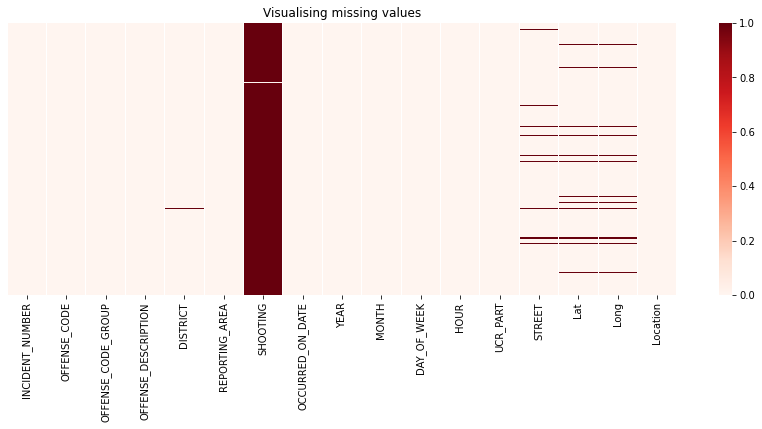

In [15]:
# visualization null values using heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap = 'Reds', annot=False,yticklabels= False)
plt.title('Visualising missing values')

A large number of mole values were not reported in the shooting, so no crime occurred and we fill it with 'N'.

In [7]:
## if there is Nan value that means no shoting happening
df['SHOOTING']=df['SHOOTING'].fillna('N')
df['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [8]:
## Fill nan values
df.DISTRICT.fillna('none', inplace=True)
df.STREET.fillna('none', inplace=True)
df.UCR_PART.fillna('none', inplace=True)
df.Lat.fillna('-1', inplace=True)
df.Long.fillna('-1', inplace=True)


In [9]:
df.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

We handled null values , now we can visualizing our data better

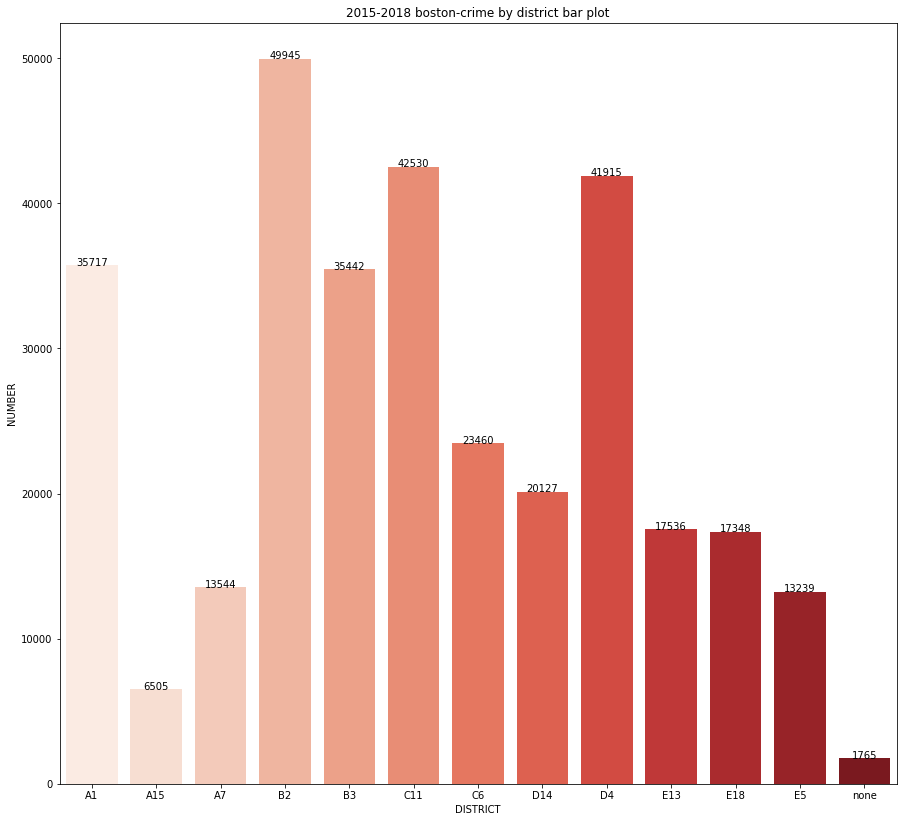

In [11]:
## Visualization by DISTRICT
disgroup = df.groupby(by='DISTRICT')
groupcount = disgroup.count()
number = groupcount.iloc[:,0]
number = pd.DataFrame(number)
number.rename(columns={'INCIDENT_NUMBER':'NUMBER'}, inplace=True)
## Plot
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 boston-crime by district bar plot')
sns.barplot(x=number.index, y='NUMBER', data=number,palette='Reds')
x = np.arange(number.index.shape[0])
y = np.array(list(number['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05, '%d'%j, ha='center')
else:
    pass
plt.show()

Most crimes happened on B2

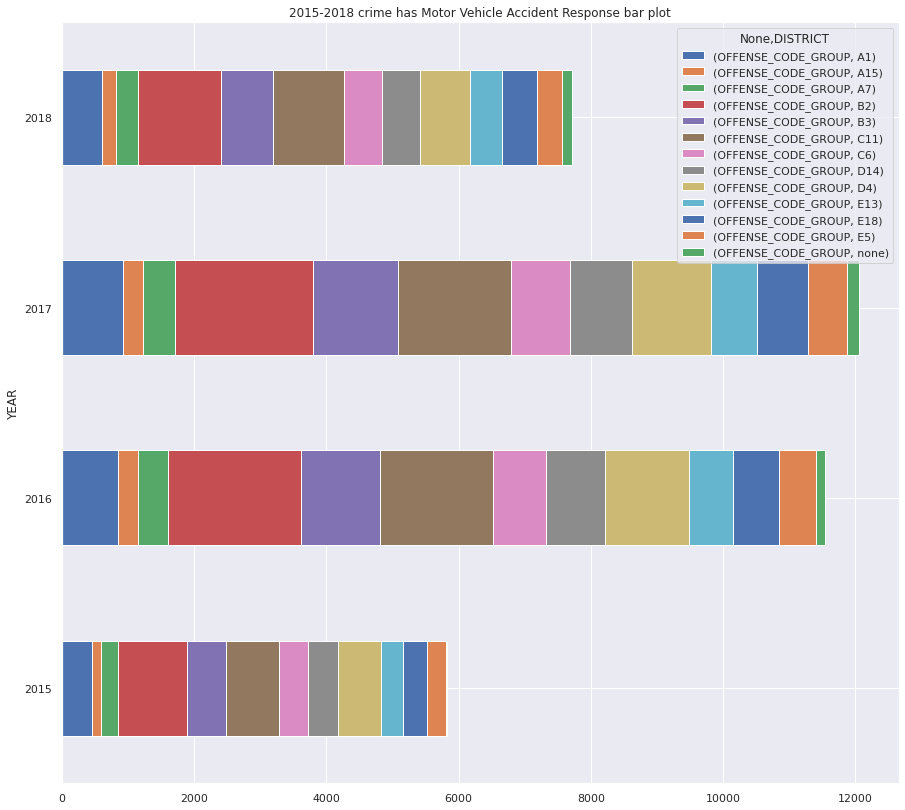

In [13]:
## Motor Vehicle Accident Response crime Visualization
motorcrime = pd.pivot_table(df.loc[df['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response',['YEAR', 'DISTRICT', 'OFFENSE_CODE_GROUP']],\
    index='YEAR',columns='DISTRICT', aggfunc=np.count_nonzero)
sns.set()
motorcrime.plot(title=r'2015-2018 crime has Motor Vehicle Accident Response bar plot', figsize=(15,14), kind='barh', stacked=True)
plt.show()



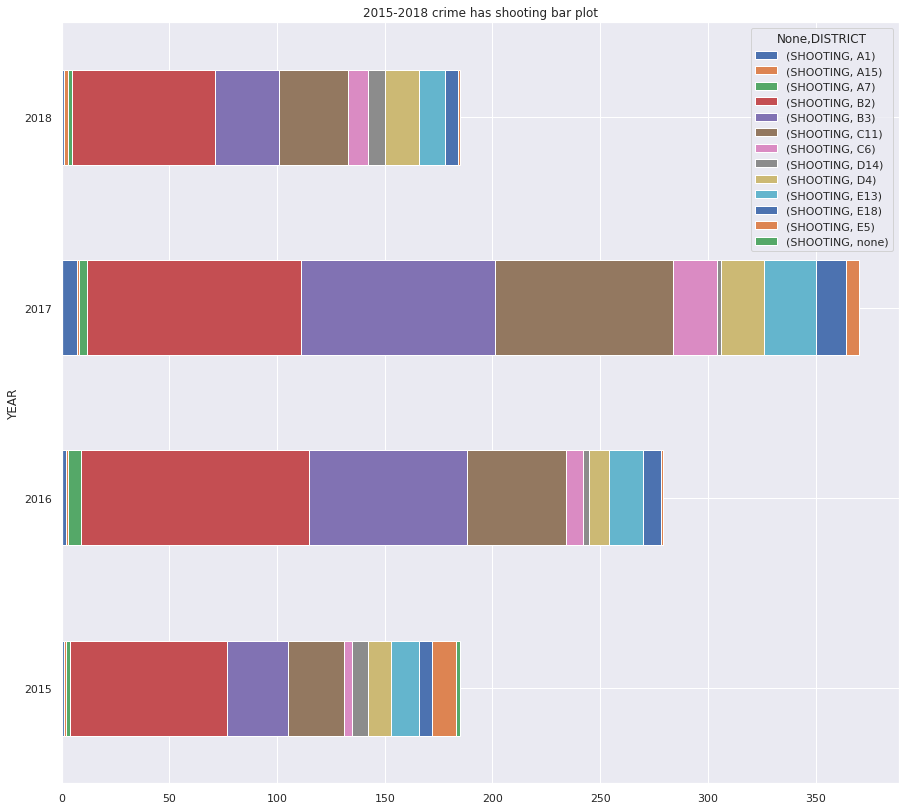

In [14]:
## Shooting crime Visualization
shootcrime = pd.pivot_table(df.loc[df['SHOOTING']=='Y',['YEAR', 'DISTRICT', 'SHOOTING']],\
    index='YEAR',columns='DISTRICT', aggfunc=np.count_nonzero)
sns.set()
shootcrime.plot(title=r'2015-2018 crime has shooting bar plot', figsize=(15,14), kind='barh', stacked=True)
plt.show()


In [15]:
#Some interesting information from the dataset
max_street_crime = df['STREET'].value_counts().index[0]
max_year_crime = df['YEAR'].value_counts().index[0]
max_hour_crime = df['HOUR'].value_counts().index[0]
max_month_crime = df['MONTH'].value_counts().index[0]
max_day_crime = df['DAY_OF_WEEK'].value_counts().index[0]

month = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

print('Street with higher occurrence of crimes:', max_street_crime)
print('Year with highest crime occurrence:', max_year_crime)
print('Hour with highest crime occurrence:', max_hour_crime)
print('Month with highest crime occurrence:', month[max_month_crime-1], max_month_crime)
print('Day with highest crime occurrence:', max_day_crime)

Street with higher occurrence of crimes: WASHINGTON ST
Year with highest crime occurrence: 2017
Hour with highest crime occurrence: 17
Month with highest crime occurrence: August 8
Day with highest crime occurrence: Friday


Now we have useful Summery of crimes , but we'll continue

Text(0.5, 1.0, 'Top 10 crimes in Boston')

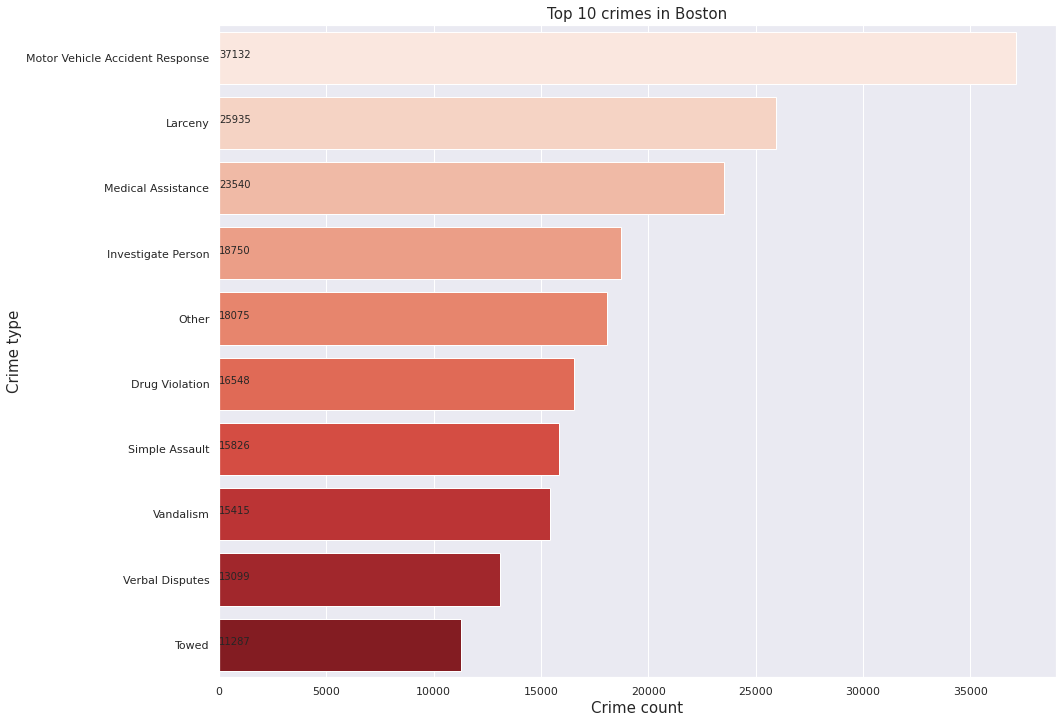

In [16]:
## Top 10 crimes in Bosto
offense_groups = df['OFFENSE_CODE_GROUP'].value_counts()
offense_groups_top10 = offense_groups[:10]
plt.figure(figsize=(15,12))
sns.barplot(offense_groups_top10.values, offense_groups_top10.index,palette='Reds')
for i, v in enumerate(offense_groups_top10.values):
    plt.text(0,i,v,fontsize=10)
plt.xlabel('Crime count', fontsize=15)
plt.ylabel('Crime type', fontsize=15)
plt.title('Top 10 crimes in Boston', fontsize=15)

Text(0.5, 1.0, '10 Most popular crimes for 23:00 - 06:00')

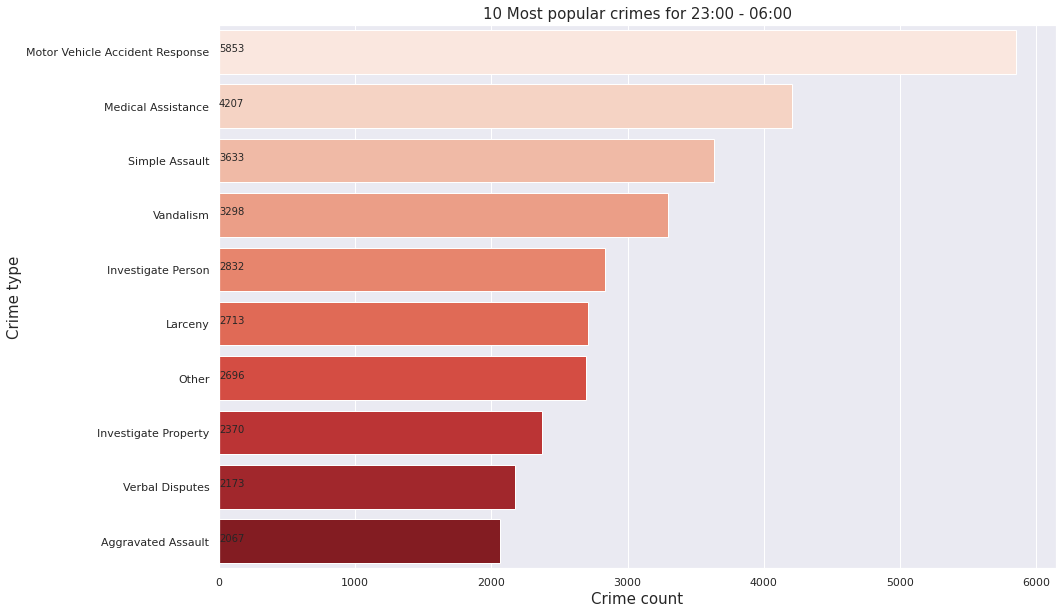

In [18]:
## Top 10 crimes at night between 23:00 - 06:00
mask1 = df[df['HOUR'] >= 23]
mask2 = df[df['HOUR'] < 6]
df_all_rows = pd.concat([mask1, mask2])

new_offense_groups = df_all_rows['OFFENSE_CODE_GROUP'].value_counts()
new_offense_groups = new_offense_groups[:10]
plt.figure(figsize=(15,10))
sns.barplot(new_offense_groups.values, new_offense_groups.index,palette='Reds')
for i, v in enumerate(new_offense_groups.values):
    plt.text(0,i,v,fontsize=10)
plt.xlabel('Crime count', fontsize=15)
plt.ylabel('Crime type', fontsize=15)
plt.title('10 Most popular crimes for 23:00 - 06:00', fontsize=15)


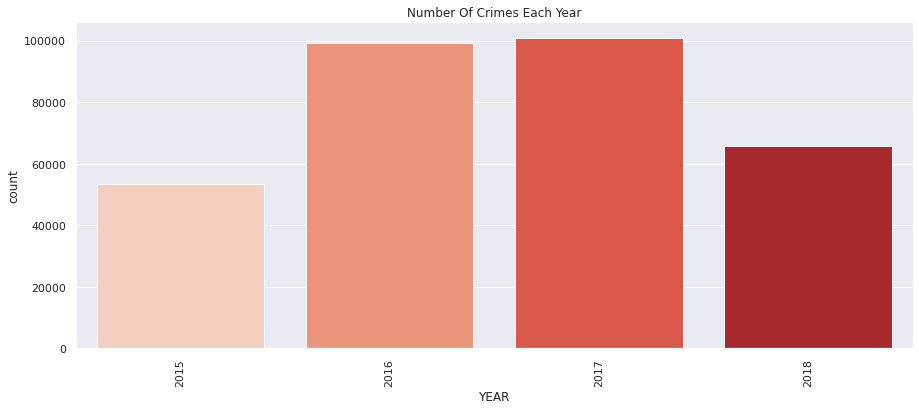

In [19]:
## Number Of Crimes Each Year
plt.subplots(figsize=(15,6))
sns.countplot('YEAR',data=df,palette='Reds')
plt.xticks(rotation=90)
plt.title('Number Of Crimes Each Year')
plt.show()

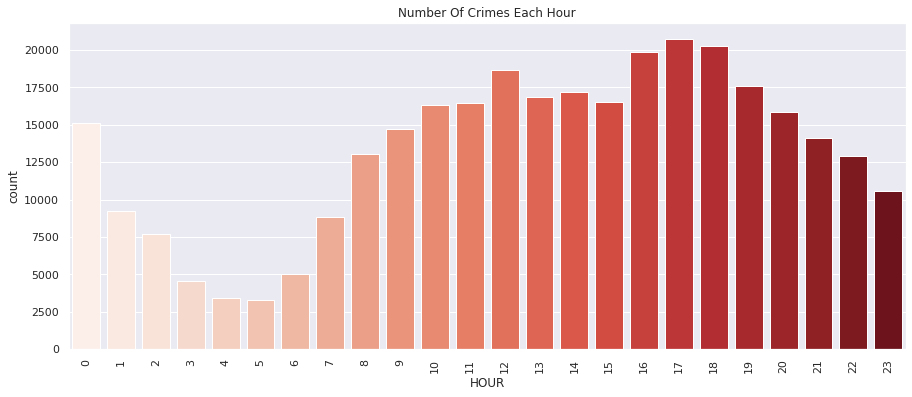

In [20]:
## Number Of Crimes Each Hour
plt.subplots(figsize=(15,6))
sns.countplot('HOUR',data=df,palette='Reds')
plt.xticks(rotation=90)
plt.title('Number Of Crimes Each Hour')
plt.show()


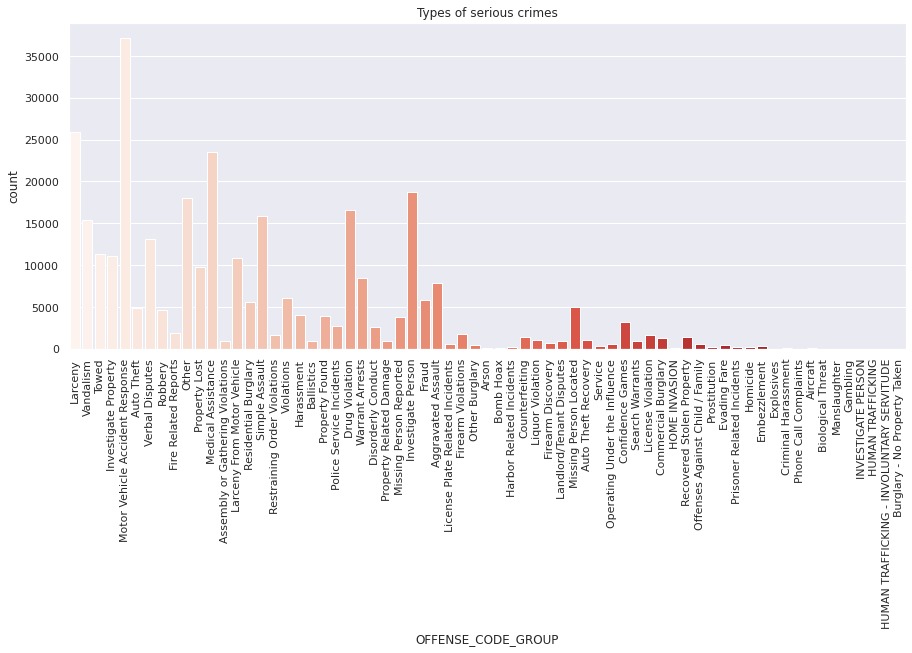

In [21]:
## Types of serious crimes
plt.subplots(figsize=(15,6))
sns.countplot('OFFENSE_CODE_GROUP',data=df,palette='Reds')
plt.xticks(rotation=90)
plt.title('Types of serious crimes')
plt.show()

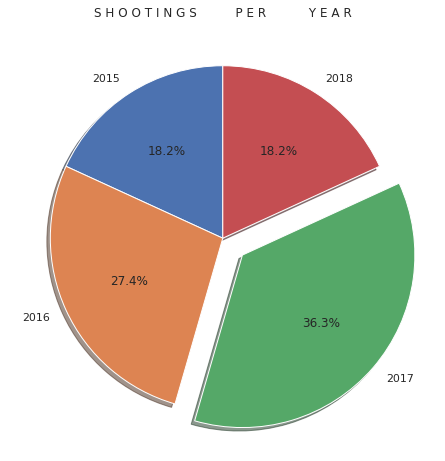

In [22]:
fig = plt.figure(figsize=(17,17))
ax1 = plt.subplot(121)
shootings_per_year = df.loc[df['SHOOTING'] == 'Y'].groupby(['YEAR']).size()
ax1.pie(shootings_per_year.values, explode=(0, 0, 0.15, 0), labels=shootings_per_year.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("S H O O T I N G S          P E R           Y E A R")
plt.show()